In [1]:
from dolfin import *
from mshr import *

In [2]:
# Create mesh
rectangle = Rectangle(Point(-1., -1.), Point(1., 1.))
circle1 = Circle(Point(0., 0.), 0.5, segments=32)  # segments = intervals on the circle
circle2 = Circle(Point(0., 0.), 0.75, segments=32)
domain = rectangle
domain.set_subdomain(1, circle1)
domain.set_subdomain(2, circle2 - circle1)
domain.set_subdomain(3, rectangle - circle2)
# mesh = generate_mesh(domain, 15)
mesh = generate_mesh(domain, 25)  # number of elements

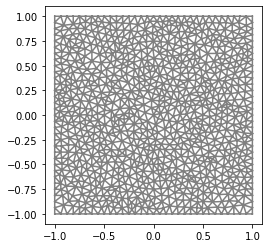

In [3]:
plot(mesh)

In [4]:
# Create subdomains
subdomains = MeshFunction("size_t", mesh, 2, mesh.domains())

In [5]:
# Create boundaries
class Left(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0] + 1.) < DOLFIN_EPS


class Right(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0] - 1.) < DOLFIN_EPS


class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[1] + 1.) < DOLFIN_EPS


class Top(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[1] - 1.) < DOLFIN_EPS


boundaries = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)
bottom = Bottom()
bottom.mark(boundaries, 1)
left = Left()
left.mark(boundaries, 2)
right = Right()
right.mark(boundaries, 2)
top = Top()
top.mark(boundaries, 3)

In [7]:
# Save
File("thermal_block.xml") << mesh
File("thermal_block_physical_region.xml") << subdomains
File("thermal_block_facet_region.xml") << boundaries
XDMFFile("thermal_block.xdmf").write(mesh)
# XDMFFile("thermal_block_physical_region.xdmf").write(subdomains)
# XDMFFile("thermal_block_facet_region.xdmf").write(boundaries)

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to open file.
*** Reason:  Unknown file type (".msh") for file "thermal_block.msh".
*** Where:   This error was encountered inside File.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.2.0.dev0
*** Git changeset:  unknown
*** -------------------------------------------------------------------------
